# Explore Quora Question Pairs

- id : the id of a training set question pair
- qid1, qid2 : unique ids of each question (only available in train.csv)
- question1, question2 : the full text of each question
- is_duplicate : the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("input/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## What is the same question?

In [3]:
df[df.is_duplicate==1].drop(["id", "qid1", "qid2"], axis=1).head(15)

,question1,question2,is_duplicate
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,How can I be a good geologist?,What should I do to be a great geologist?,1
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,What was your first sexual experience like?,What was your first sexual experience?,1
15,What would a Trump presidency mean for current...,How will a Trump presidency affect the student...,1
16,What does manipulation mean?,What does manipulation means?,1
18,Why are so many Quora users posting questions ...,Why do people ask Quora questions which can be...,1
20,Why do rockets look white?,Why are rockets and boosters painted white?,1
29,How should I prepare for CA final law?,How one should know that he/she completely pre...,1


## Frequency of is_duplicate

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

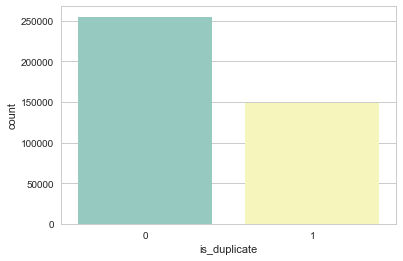

In [5]:
sns.countplot('is_duplicate', data=df, palette="Set3")

## Difference in question length

In [6]:
df['question1'] = df['question1'].fillna('')
df['question2'] = df['question2'].fillna('')

df['len_q1'] = df['question1'].apply(lambda x: len(str(x)))
df['len_q2'] = df['question2'].apply(lambda x: len(str(x)))
df['diff_len'] = df['len_q1'] - df['len_q2']

df['len_word_q1'] = df['question1'].apply(lambda x: len(str(x).split()))
df['len_word_q2'] = df['question2'].apply(lambda x: len(str(x).split()))
df['diff_len_word'] = df['len_word_q1'] - df['len_word_q2']

df['avg_world_len1'] = df['len_q1'] / df['len_word_q1']
df['avg_world_len2'] = df['len_q2'] / df['len_word_q2']
df['diff_avg_word'] = df['avg_world_len1'] - df['avg_world_len2']
df['diff_avg_word'] = df['diff_avg_word'].fillna(0)

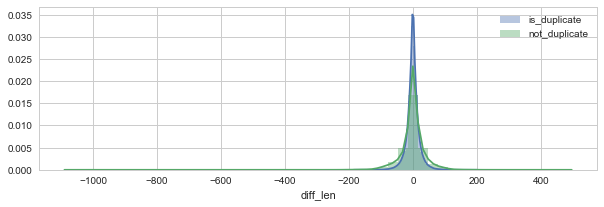

In [7]:
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.distplot(df[df['is_duplicate']==1].diff_len, label="is_duplicate")
sns.distplot(df[df['is_duplicate']==0].diff_len, label="not_duplicate")
plt.legend()

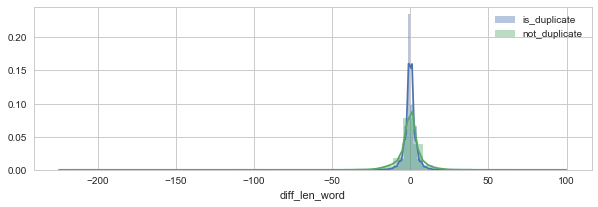

In [8]:
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.distplot(df[df['is_duplicate']==1].diff_len_word, label="is_duplicate")
sns.distplot(df[df['is_duplicate']==0].diff_len_word, label="not_duplicate")
plt.legend()

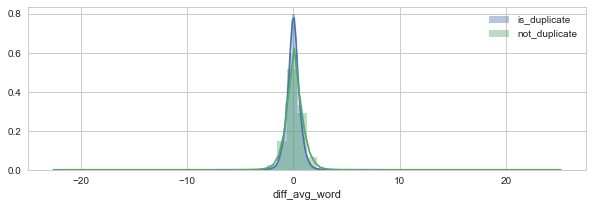

In [9]:
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.distplot(df[df['is_duplicate']==1].diff_avg_word, label="is_duplicate")
sns.distplot(df[df['is_duplicate']==0].diff_avg_word, label="not_duplicate")
plt.legend()

In [10]:
print("Difference sent length mean : {:0.2f}".format(df.diff_len.mean(skipna=True)))
print("Difference sent length median : {:.2f}".format(df.diff_len.median(skipna=True)))
print("Difference sent length mode : {}".format(df.diff_len.mode()[0]))
print("Difference sent length max : {}".format(df.diff_len.max(skipna=True)))
print("Difference sent length min : {}".format(df.diff_len.min(skipna=True)))
print("\n")
print("Difference word length mean : {:0.2f}".format(df.diff_len_word.mean(skipna=True)))
print("Difference word length median : {:.2f}".format(df.diff_len_word.median(skipna=True)))
print("Difference word length mode : {}".format(df.diff_len_word.mode()[0]))
print("Difference word length max : {}".format(df.diff_len_word.max(skipna=True)))
print("Difference word length min : {}".format(df.diff_len_word.min(skipna=True)))

Difference sent length mean : -0.57
Difference sent length median : 0.00
Difference sent length mode : 0
Difference sent length max : 487
Difference sent length min : -1080


Difference word length mean : -0.24
Difference word length median : 0.00
Difference word length mode : 0
Difference word length max : 98
Difference word length min : -223
